### This notebook is to tune hyperparameters of random forest using GridSearchCV

### The result as follows
- R2 82%
- RMSE 1783.65

In [61]:
import warnings
import pandas as pd
import numpy as np
from time import time as T
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
###read dataset
df = pd.read_csv('../features.csv')

In [3]:
X = df.drop('vehicle_list_price',axis =1)
y = df.vehicle_list_price

### Train test splits
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [4]:
#random forest regressor
reg_rfr = RandomForestRegressor(random_state=42)
#parameter grids
params =dict(
n_estimators=[200,300],
criterion=['mse'],
max_depth=[5,10,15,20,25,30,35,40,45,50],
min_samples_split=[2,5,7,9,11],
max_features=['sqrt'],
n_jobs=[-1],
verbose=[1])

In [9]:
grid = GridSearchCV(estimator=reg_rfr,
                    param_grid=params,
                    scoring = 'neg_mean_squared_error',
                    cv=5,
                    n_jobs=-1,return_train_score= True)

In [10]:
start = T()
grid.fit(X_train,y_train)
print(f"Finished in {T() - start:.2f} seconds")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   11.8s


Finished in 4339.21 seconds


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.3s finished


In [30]:
df_train_test = show_cv_results(grid)

In [83]:
df_train_test[35:40]

,rmse_test,rmse_train,diff,params
35,1796.586697,1568.116771,228.469926,"{'criterion': 'mse', 'max_depth': 20, 'max_fea..."
36,1801.485541,1591.866372,209.619168,"{'criterion': 'mse', 'max_depth': 20, 'max_fea..."
37,1802.932661,1594.913426,208.019235,"{'criterion': 'mse', 'max_depth': 20, 'max_fea..."
38,1807.860226,1614.197769,193.662457,"{'criterion': 'mse', 'max_depth': 20, 'max_fea..."
39,1810.766647,1617.885345,192.881301,"{'criterion': 'mse', 'max_depth': 20, 'max_fea..."


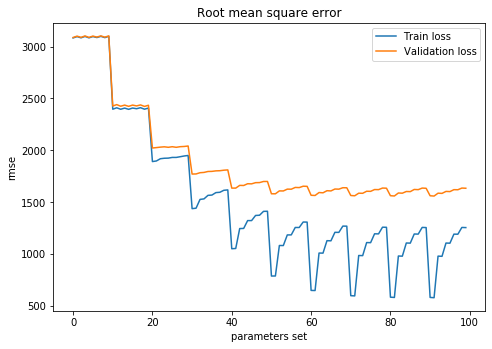

In [23]:
show_grid_cv(grid)

### Pick a parameter set that reduce the gap between train score and test score.

In [43]:
grid.cv_results_['params'][39]

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 11,
 'n_estimators': 300,
 'n_jobs': -1,
 'verbose': 1}

In [44]:
reg_rfr = RandomForestRegressor(**grid.cv_results_['params'][39])
reg_rfr.fit(X_train,y_train)
y_pred = reg_rfr.predict(X_test)
print(f"R2: {r2_score(y_test,y_pred): .2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred)):.2f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.2s finished


R2:  0.82
RMSE: 1783.65


In [45]:
y_pred_train = reg_rfr.predict(X_train)
print(f"R2: {r2_score(y_train,y_pred_train): .2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train,y_pred_train)):.2f}")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s


R2:  0.85
RMSE: 1624.07


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.2s finished
